In [98]:
 # Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [99]:
 # Load .env enviroment variables
load_dotenv()

True

In [100]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000

In [101]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [102]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [103]:
data_btc = requests.get(btc_url).json()


In [104]:
data_eth = requests.get(eth_url).json()


In [105]:
# Fetch current BTC price
# YOUR CODE HERE!
current_BTC = data_btc['data']['1']['quotes']['USD']['price']
print(BTC)
# Fetch current ETH price
# YOUR CODE HERE!]
current_ETH = data_eth['data']['1027']['quotes']['USD']['price']
print(ETH)
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * current_BTC
my_eth_value = my_eth * current_ETH
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

12993.03
412.6
The current value of your 1.2 BTC is $15733.45
The current value of your 5.3 ETH is $2193.67


In [106]:
#Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)
# Current amount of shares
my_agg = 200
my_spy = 50

In [107]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
# Create the Alpaca API object
# YOUR CODE HERE!

In [108]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_portfolio

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [109]:
# Compute the current value of shares
# YOUR CODE HERE!

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $23731.00


In [110]:
# Savings Health Analysis
# Create savings DataFrame
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_spy_value  + my_spy_value 

amount_data = {"amount":[crypto,shares]}

stickers = ["crypto", "shares"]

df_savings = pd.DataFrame(amount_data, index=stickers)
# Display savings DataFrame
display(df_savings)

,amount
crypto,17927.122
shares,31889.000


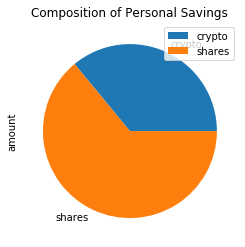

In [111]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [112]:
 # Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares
total_savings
# Validate saving health
if total_savings > emergency_fund:
    print ("Congratulations! You have enough money in your emergency fund.")
else:
    print ("Sorry! you dont have enough emergency fund")

# YOUR CODE HERE!

Congratulations! You have enough money in your emergency fund.


In [113]:
 #Part 2 - Retirement Planning

In [114]:
 # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-23', tz='America/New_York').isoformat()

In [115]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [116]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_30year.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [117]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001772,0.998480,1.003804,1.004830,1.002710,1.003076,1.002604,0.994771,0.984641,0.992147,...,1.003146,0.986252,0.999826,0.982000,0.994529,0.999021,1.002863,1.002048,1.004107,0.997614
2,1.000228,1.007391,1.008231,1.010453,1.002100,0.994671,0.999192,0.993175,0.988677,0.985047,...,0.999939,0.991747,1.001541,0.979191,0.994187,1.002548,1.005282,0.998058,0.998990,0.998652
3,1.000610,1.002517,1.017114,1.018610,1.003436,0.989462,1.007246,0.998647,0.988739,0.989371,...,0.997265,0.989673,1.003575,0.978720,0.992736,0.995280,1.021980,0.995176,0.985896,1.001080
4,1.009694,1.005556,1.012899,1.017917,1.000869,0.980229,1.020811,0.995567,0.980820,0.994691,...,0.989854,0.990460,0.995747,0.982923,0.990276,0.992782,1.018356,0.998024,0.989473,1.010161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.435200,9.927138,11.900356,29.490465,7.387978,5.149598,12.911939,4.403681,7.830293,4.392126,...,8.852854,17.583628,10.818897,3.992402,7.879746,10.358296,11.706945,14.064355,10.289581,11.044491
7557,20.430206,10.020912,11.797126,30.013459,7.321053,5.208394,12.897581,4.360295,7.838215,4.412895,...,8.881941,17.601448,10.837221,3.994247,7.829505,10.313673,11.678756,14.092238,10.199221,11.104355
7558,20.546928,9.988184,11.624682,29.901305,7.414388,5.251884,12.852455,4.372122,7.835231,4.420255,...,8.911114,17.596437,11.015900,4.074052,7.857270,10.288858,11.558269,14.118434,10.288945,11.025454
7559,20.816029,9.825042,11.629374,29.974602,7.446905,5.209414,12.935630,4.324920,7.835204,4.421524,...,8.950559,17.640680,10.999199,4.082869,7.833389,10.241556,11.531849,14.156578,10.223489,11.025094


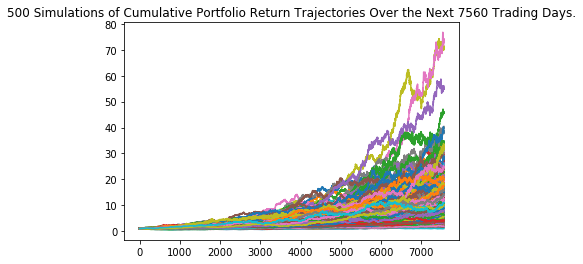

In [118]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

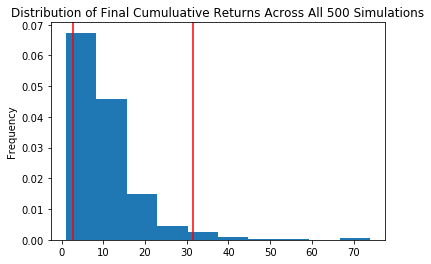

In [119]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.525162
std               8.107037
min               0.989616
25%               5.550484
50%               8.378541
75%              12.647122
max              73.975231
95% CI Lower      2.728204
95% CI Upper     31.558821
Name: 7560, dtype: float64


In [121]:
#Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [122]:
 # Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54564.07 and $631176.42


In [123]:
 # Set initial investment
new_investment = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_1 = round(tbl[8]*new_investment,2)
ci_upper_1 = round(tbl[9]*new_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${new_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_1} and ${ci_upper_1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81846.11 and $946764.63
